# Impact of nuclear accidents

## Introduction
This notebook will be used for answering the question "Are there observable impacts of events / disasters (e.g. Chernobyl, Fukushima) on the use of nuclear energy?"

### Accidents
The International Atomic Energy Agency (IAEA) defines the International Nuclear and Radiological Event Scale (INES) which can be found at: https://www.iaea.org/sites/default/files/ines.pdf. They define seven levels of nuclear events, where level 1 to 3 are defined as incidents and level 4 to 7 are defined as accidents. We will focus on the more severe accidents with level 5-7. The rating is based on three categories:

- _People and the Environment_: Released radiation dose
- _Radiological Barriers and Control_: Radiation dose released within the installation
- _Defence-in-Depth_: How well the defense measures are working

We are only exploring accidents, that have a direct link to nuclear power plants. There are for example some accidents linked to medical nuclear treatment, which will be excluded on purpose.
The Institute for Energy and Environmental Research (IEER) lists some nuclear reactor accidents on https://ieer.org/resource/factsheets/table-nuclear-reactor-accidents/.

- __7__: Major accident
    - Chernobyl disaster in April 1986 (Soviet Ukraine)
    - Fukushima disaster in March 2011 (Japan)
- __6__: Serious accident
    - Kyshtym disaster in September 1957 (Soviet Russia)
- __5__: Accident with wider consequences
    - First Chalk River accident in December 1952 (Canada)
    - Windscale fire in October 1957 (UK/England)
    - Three Mile Island accident in March 1979 (USA/Pennsylvania)

### Policies
Additionally, we also look into country's policies on nuclear energy. Wikipedia (https://en.wikipedia.org/wiki/Nuclear_energy_policy_by_country) lists some interesting policies, where the most important ones are summarized here:

- __Australia__: Nuclear power is forbidden since 1999
- __Austria__: Nuclear reactions are forbidden since 1978
- __Belgium__: planned to phase-out by 2025 in 2018
- __Denmark__: Production is forbidden since 1985
- __Germany__: planned to phase-out by 2022	in 2011
- __Italy__: Did a phase-out in late 1980s, illegal since 2011
- __Serbia__: is restricting nuclear power since 1995
- __Sweden__: has a limit of 10 reactors; only replacing and not building new ones
- __Taiwan__: no new reactors/no life extensions policy since 2016
- __USA__: 13 states have restrictions on nuclear power production

Also Estonia, Greece, Ireland, Latvia, Liechtenstein, Luxembourg, Malta, Portugal, Israel, Malaysia and Norway do not have any nuclear power plants.

Some of these policies could be reactions on nuclear accidents. However, we will explore the development of
- __nuclear power generation__: absolute (amount of nuclear energy) and relative (share of nuclear energy) worldwide and especially for the countries, where the accidents happened
- __reactor types__: Is there a globally/regionally observable trend of reactor types since these accidents? Unfortunately the global power plant database does not include any information for reactor types. We requested access to the PRIS database of the IAEA, but did not receive any answer.
- __values__: Is there a change in certain values of the world's population or a regional trend detectable? There is one question available about environment vs. economic growth. This could be interesting, because the amount of used energy is a good indicator for the wealth of a population. It would be interesting to see, if people are more likely to make sacrifices in economical growth, since the major nuclear accidents.

## World Value Survey

Exploring the trend in values.

In [284]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
df, meta = pyreadstat.read_sav("data/VWS/Integrated_values_surveys_1981-2021.sav", encoding="cp850")
df["year"] = (df["S020"].astype(int)//5 * 5)
#df.loc[df["year"] == 1985, "year"] = 1980
# loading country codes
iso_codes = pd.read_csv("data/VWS/iso country codes/iso3166.tsv", sep="\t")
iso_codes["Numeric"] = iso_codes["Numeric"].fillna(0).astype(int)
alpha2_to_alpha3 = iso_codes.set_index("Alpha-2 code")["Alpha-3 code"].to_dict()

def map_codes(alpha2val):
    if alpha2val in alpha2_to_alpha3:
        return alpha2_to_alpha3[alpha2val]
    else:
        return "invalid"

df["country"] = df["S009"].apply(map_codes)

The question of interest in this case is only the question "B008", where the possible answers are:
- 1: protecting the environment is more important than economic growth
- 2: economic growth is more important than protecting the environment
- 3: custom answer

In [285]:
# get rid of answer nr. 3 and NaNs
economic_vs_environment = df[['country', 'year', 'B008']]
economic_vs_environment = economic_vs_environment[economic_vs_environment.B008.isin([1,2])]
# group by country and year
wvs_agg_world = economic_vs_environment.groupby(['year']).mean()
wvs_agg = economic_vs_environment.groupby(['country','year']).mean()

Let's look at the worldwide development of opinions:

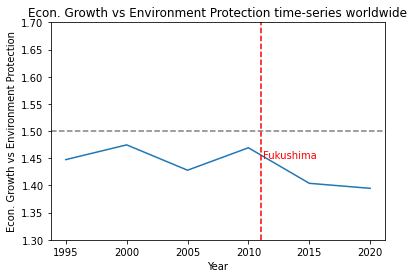

In [302]:
ax = sns.lineplot(x=wvs_agg_world.index, y=wvs_agg_world.B008)
ax.set(ylim=(1.3,1.7))
plt.axvline(x=2011, label="Fukushima Disaster", color="red", linestyle="--")
plt.axhline(y=1.5, label="Baseline", color="grey", linestyle="--")
plt.text(2011.2, 1.45,'Fukushima',c="red")

ax.set_title("Econ. Growth vs Environment Protection time-series worldwide")
ax.set_ylabel("Econ. Growth vs Environment Protection")
ax.set_xlabel("Year");

So we can observe a slight worldwide trend towards environmental protection. Unfortunately, the data to this question is only available starting in 1995. The trend towards environmental protection is stronger since the Fukushima disaster. However, it is not possible to say if the disaster caused this global change of values. We will now further investigate the values of single countries, especially the values of Japan, where the Fukushima disaster happened.
Let's look at Japan:

In [287]:
wvs_agg = wvs_agg.reset_index()

In [288]:
wvs_agg = wvs_agg[wvs_agg.country != 'invalid']

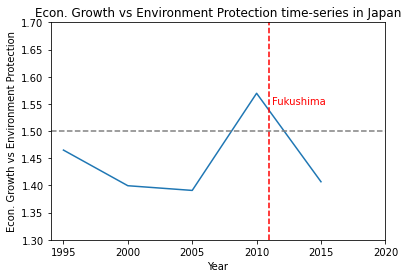

In [303]:
ax = sns.lineplot(x=wvs_agg[wvs_agg.country.eq('JPN')].year, y=wvs_agg[wvs_agg.country.eq('JPN')].B008)
ax.set(ylim=(1.3,1.7))
plt.axvline(x=2011, label="Fukushima Disaster", color="red", linestyle="--")
plt.axhline(y=1.5, label="Baseline", color="grey", linestyle="--")
plt.text(2011.2, 1.55,'Fukushima',c="red")

ax.set_xticks([1995,2000,2005,2010, 2015, 2020])
ax.set_title("Econ. Growth vs Environment Protection time-series in Japan")
ax.set_ylabel("Econ. Growth vs Environment Protection")
ax.set_xlabel("Year");

In Japan there was a trend until 2005 to further protect the environment. However, in the year 2010 economical growth seemed to be more important. In 2015 the trend was back on protecting the environment. It is hard to say if the Fukushima disaster had any impact on this trend, but it is safe to say, that there is a stronger trend towards environmental protection since the disaster. Unfortunately the data for 2020 is missing in Japan.

In [290]:
print(len(wvs_agg.country.unique()))
print(len(wvs_agg[wvs_agg.duplicated(subset='country', keep=False)].country.unique()))
wvs_agg = wvs_agg[wvs_agg.duplicated(subset='country', keep=False)]

106
78


So there is survey data for 106 countries. However there are some countries with only one year available. We cannot analyze a trend for this countries. Therefore we only take countries into account with 2 or more year measurements. Those are 78 countries. We arrange a facet plot for quickly looking at the different countries.

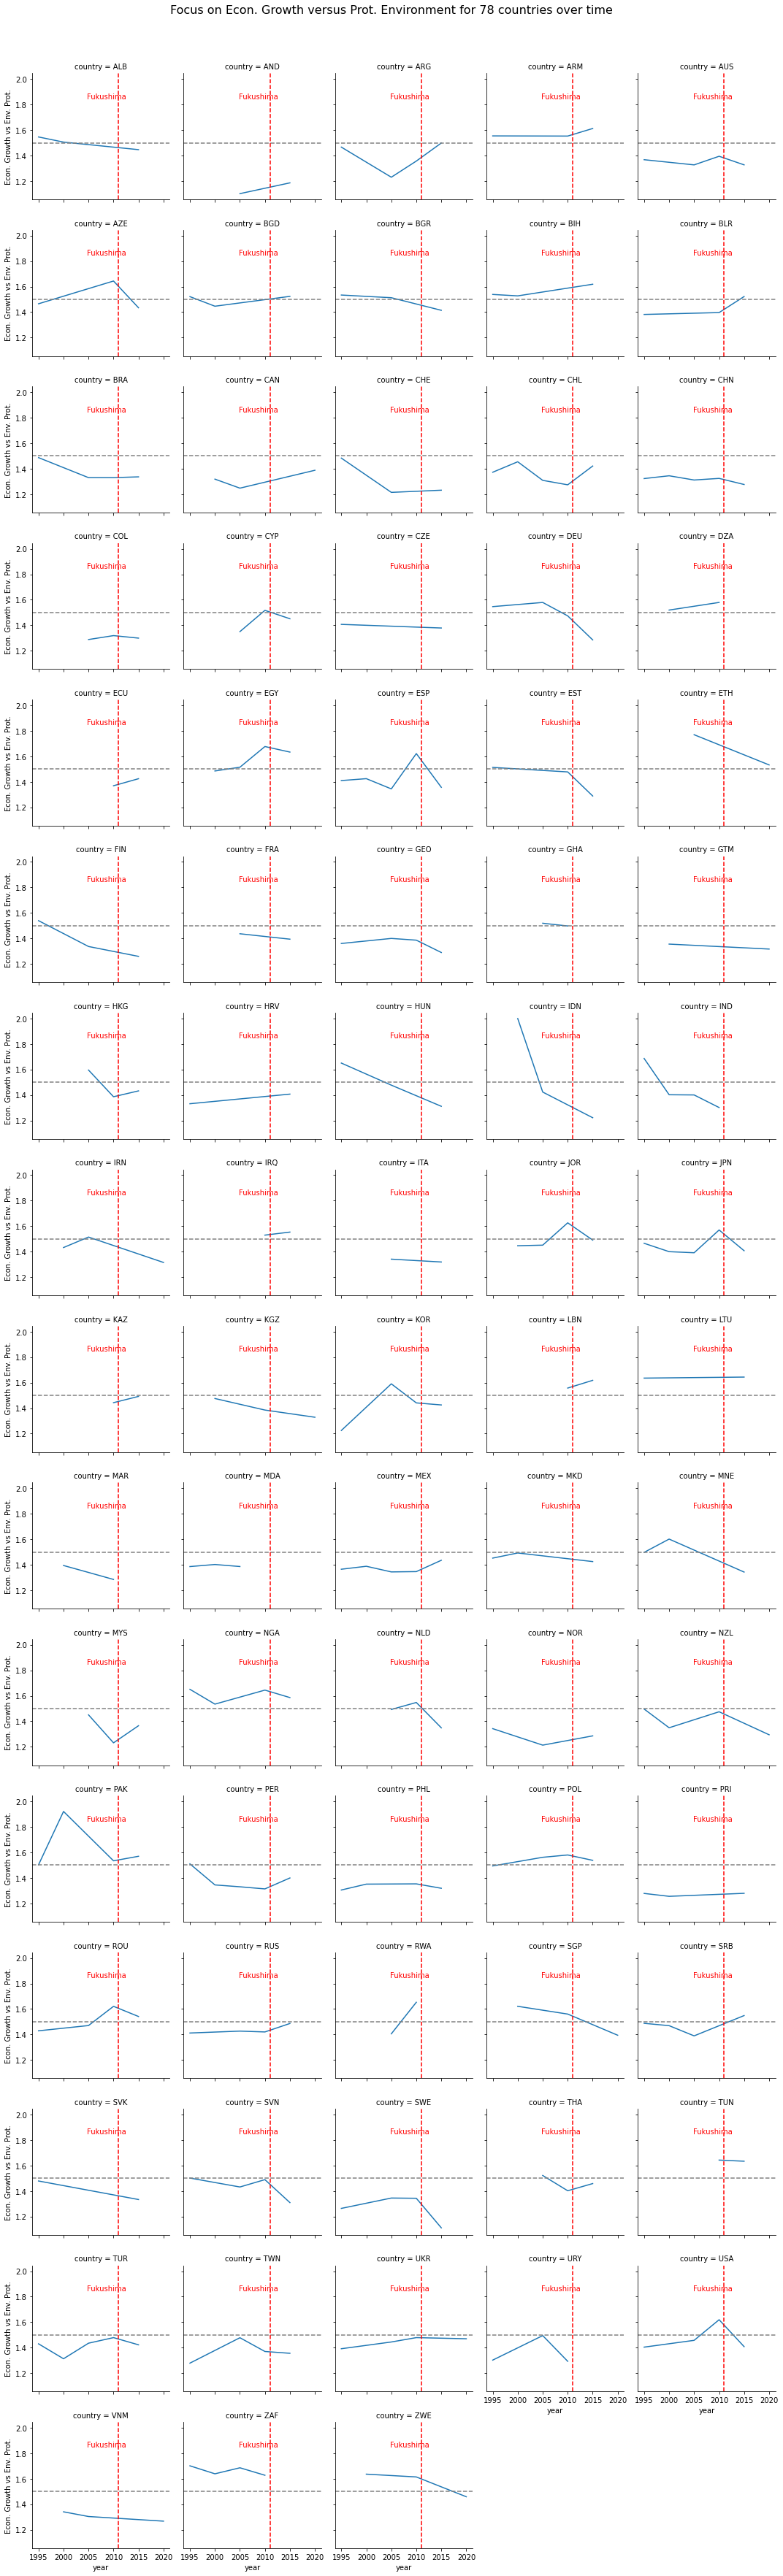

In [304]:
def annotate(data, **kws):
    ax = plt.gca()
    ax.text(.4, .8, "Fukushima", color ="red", transform=ax.transAxes)

g = sns.FacetGrid(wvs_agg, col="country", col_wrap=5)
g.map_dataframe(sns.lineplot, x="year", y="B008")
#g.fig.subplots_adjust(top=0.9)
g.refline(y=1.5, linestyle="dashed", color="grey")
g.refline(x=2011, linestyle="dashed", color="red")
g.map_dataframe(annotate)
g.fig.suptitle('Focus on Econ. Growth versus Prot. Environment for 78 countries over time', size=16, y=1.02)
g.set_ylabels("Econ. Growth vs Env. Prot.");

There are some countries, that changed their opinions in favor for economy even after the Fukushima Disaster. Some of them are Armenia, Belarus, Chile, Russia...

However, there are many countries, where a notable change of trend inf favor for protection of the environment can be observed since Fukushima.
Australia, Azerbaijan, China, Columbia, Cyprus, Germany, Egypt, Spain, Estonia, Georgia, Jordan, Japan, Nigeria, The Netherlands, New Zealand, Poland, Romania, Singapore, Slovenia, Sweden, Turkey, USA, Zimbabwe.

## Change of Reactor Types

We will use th global database of power plants for this task. All nuclear plants reported from the IAEA are included in this database. For other types of power plants not all plants are listed.

In [292]:
power_plants = pd.read_csv("data/PowerPlantDatabase/global_power_plant_database.csv", low_memory=False)
power_plants_nuclear = power_plants[power_plants.primary_fuel.eq('Nuclear')]
power_plants_nuclear

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
101,ARG,Argentina,ATUCHA I,ARG0000029,370.0,-33.9670,-59.2059,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,1303.91,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
102,ARG,Argentina,ATUCHA II,ARG0000030,745.0,-33.9674,-59.2045,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,2625.45,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
229,ARG,Argentina,EMBALSE,ARG0000112,648.0,-32.2316,-64.4422,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,2283.62,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
328,ARM,Armenia,Armenian-2,WRI1019028,375.0,40.1805,44.1498,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,2411.04,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
1043,BEL,Belgium,DOEL 4,WRI1002223,2910.0,51.3254,4.2597,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,20203.97,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33710,USA,United States of America,V C Summer,USA0006127,1029.6,34.2983,-81.3153,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,8168.11,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
33850,USA,United States of America,Vogtle,USA0000649,2430.0,33.1427,-81.7625,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,19277.88,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34035,USA,United States of America,Waterford 3,USA0004270,1199.8,29.9953,-90.4716,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,9518.35,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34055,USA,United States of America,Watts Bar Nuclear Plant,USA0007722,2539.8,35.6021,-84.7895,Nuclear,NaN,NaN,...,NaN,NaN,NaN,NaN,20148.96,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


The type of nuclear reactor is not included in this database. Hence, it is not sufficient for answering the question. The IAEA has a database called PRIS, which should store this information. We requested access to this database, but did not get any reply.

## Change of nuclear power generation

In this section we investigate the change of absolute and relative nuclear energy production worldwide and especially for the countries, where the accidents happened.

nuclear-electricity = Electricity generation from nuclear power, measured in terawatt-hours
electricity_generation,"Electricity generation, measured in terawatt-hours"

In [293]:
df_energy = pd.read_csv("data/OWID_energy/owid-energy-data.csv")
df_energy = df_energy[['iso_code', 'country', 'year', 'nuclear_electricity', 'electricity_generation']]
# calculating nuclear share of produced energy
df_energy['nuclear_electricity_share'] = df_energy['nuclear_electricity'] / df_energy['electricity_generation']
# dropping non available values
df_energy = df_energy.dropna()
df_energy

,iso_code,country,year,nuclear_electricity,electricity_generation,nuclear_electricity_share
100,AFG,Afghanistan,2000,0.0,0.467,0.0
101,AFG,Afghanistan,2001,0.0,0.592,0.0
102,AFG,Afghanistan,2002,0.0,0.687,0.0
103,AFG,Afghanistan,2003,0.0,0.939,0.0
104,AFG,Afghanistan,2004,0.0,0.894,0.0
...,...,...,...,...,...,...
17427,ZWE,Zimbabwe,2015,0.0,9.388,0.0
17428,ZWE,Zimbabwe,2016,0.0,6.826,0.0
17429,ZWE,Zimbabwe,2017,0.0,7.310,0.0
17430,ZWE,Zimbabwe,2018,0.0,9.133,0.0


In [294]:
# listing the countries that never produced nuclear electricity
uses_nuclear = df_energy.groupby('country').sum('nuclear_electricity').nuclear_electricity.gt(0).reset_index()
uses_nuclear[uses_nuclear.nuclear_electricity != True].country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4              Angola
            ...      
203           Vietnam
204    Western Sahara
206             Yemen
207            Zambia
208          Zimbabwe
Name: country, Length: 174, dtype: object

So there are 174 countries that never have used nuclear energy. Let's focus on the countries that have used nuclear energy.

In [295]:
nuclear_list = uses_nuclear[uses_nuclear.nuclear_electricity].country.tolist()
df_energy = df_energy[df_energy.country.isin(nuclear_list)]
print(nuclear_list)
df_energy

['Argentina', 'Armenia', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Czechia', 'Finland', 'France', 'Germany', 'Hungary', 'India', 'Iran', 'Italy', 'Japan', 'Kazakhstan', 'Lithuania', 'Mexico', 'Netherlands', 'Pakistan', 'Romania', 'Russia', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Ukraine', 'United Kingdom', 'United States', 'World']


,iso_code,country,year,nuclear_electricity,electricity_generation,nuclear_electricity_share
765,ARG,Argentina,1985,5.766,45.304,0.127274
766,ARG,Argentina,1986,5.711,49.022,0.116499
767,ARG,Argentina,1987,6.465,52.115,0.124053
768,ARG,Argentina,1988,5.798,52.500,0.110438
769,ARG,Argentina,1989,5.039,50.863,0.099070
...,...,...,...,...,...,...
17020,OWID_WRL,World,2016,2528.234,23925.445,0.105671
17021,OWID_WRL,World,2017,2543.990,24570.376,0.103539
17022,OWID_WRL,World,2018,2614.391,25559.572,0.102286
17023,OWID_WRL,World,2019,2720.674,25899.806,0.105046


Let's start with looking at the world data starting in 1985. Therefore the only relevant accidents could be Chernobyl in 1986 and Fukushima in 2011.

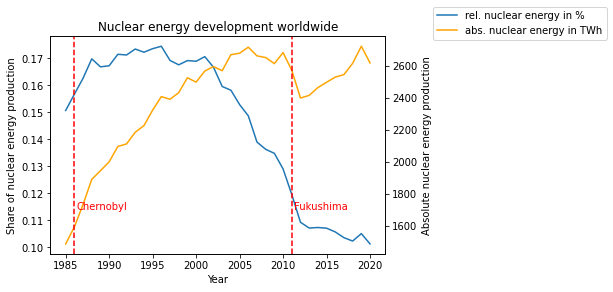

In [305]:
ax = sns.lineplot(x=df_energy[df_energy.country.eq('World')].year, y=df_energy[df_energy.country.eq('World')].nuclear_electricity_share)
ax2 = ax.twinx()
sns.lineplot(x=df_energy[df_energy.country.eq('World')].year, y=df_energy[df_energy.country.eq('World')].nuclear_electricity, color="orange")
plt.axvline(x=2011, label="Fukushima Disaster", color="red", linestyle="--")
plt.text(2011.2, 1700,'Fukushima',c="red")
plt.axvline(x=1986, label="Chernobyl Disaster", color="red", linestyle="--")
plt.text(1986.2, 1700,'Chernobyl',c="red")
ax.figure.legend(labels=["rel. nuclear energy in %","abs. nuclear energy in TWh"], loc = 2, bbox_to_anchor = (1,1))

ax.set_title("Nuclear energy development worldwide")
ax.set_ylabel("Share of nuclear energy production")
ax2.set_ylabel("Absolute nuclear energy production")
ax.set_xlabel("Year");

We can clearly see, that the trend of the share of nuclear energy production is declining since 2001. The slope around the Fukushima accident is especially steep. However, it does not appear that the event itself has changed the slope of the line. The absolute amount of nuclear energy however has increased since 2012. Let's look at the data for Ukraine.

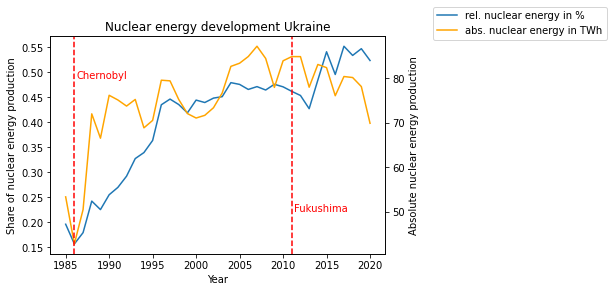

In [306]:
ax = sns.lineplot(x=df_energy[df_energy.country.eq('Ukraine')].year, y=df_energy[df_energy.country.eq('Ukraine')].nuclear_electricity_share)
ax2 = ax.twinx()
sns.lineplot(x=df_energy[df_energy.country.eq('Ukraine')].year, y=df_energy[df_energy.country.eq('Ukraine')].nuclear_electricity, color="orange")
plt.axvline(x=2011, label="Fukushima Disaster", color="red", linestyle="--")
plt.text(2011.2, 50,'Fukushima',c="red")
plt.axvline(x=1986, label="Chernobyl Disaster", color="red", linestyle="--")
plt.text(1986.2, 80,'Chernobyl',c="red")
ax.figure.legend(labels=["rel. nuclear energy in %","abs. nuclear energy in TWh"], loc = 2, bbox_to_anchor = (1,1))

ax.set_title("Nuclear energy development Ukraine")
ax.set_ylabel("Share of nuclear energy production")
ax2.set_ylabel("Absolute nuclear energy production")
ax.set_xlabel("Year");

The event of Chernobyl is interestingly at the lowest share of nuclear energy. This could be due to the fact, that this special power plant went out of operation. However, the amount and also the share of nuclear energy went up for many years. After the Fukushima accident there is a decline of amount of nuclear energy. However, the share of nuclear energy seems to rise. Let's also look at Japan.

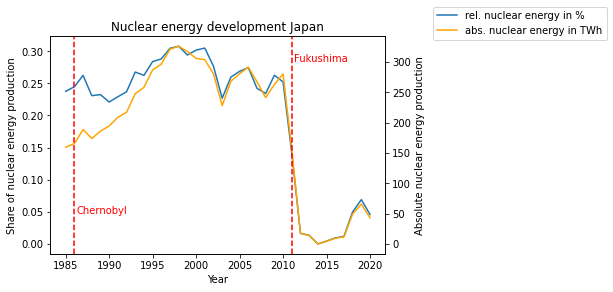

In [307]:
ax = sns.lineplot(x=df_energy[df_energy.country.eq('Japan')].year, y=df_energy[df_energy.country.eq('Japan')].nuclear_electricity_share)
ax2 = ax.twinx()
sns.lineplot(x=df_energy[df_energy.country.eq('Japan')].year, y=df_energy[df_energy.country.eq('Japan')].nuclear_electricity, color="orange")
plt.axvline(x=2011, label="Fukushima Disaster", color="red", linestyle="--")
plt.text(2011.2, 300,'Fukushima',c="red")
plt.axvline(x=1986, label="Chernobyl Disaster", color="red", linestyle="--")
plt.text(1986.2, 50,'Chernobyl',c="red")
ax.figure.legend(labels=["rel. nuclear energy in %","abs. nuclear energy in TWh"], loc = 2, bbox_to_anchor = (1,1))

ax.set_title("Nuclear energy development Japan")
ax.set_ylabel("Share of nuclear energy production")
ax2.set_ylabel("Absolute nuclear energy production")
ax.set_xlabel("Year");

There is a rapid decline in share and amount of nuclear energy around the Fukushima Disaster. This could be due to the fact, that this power plant went out of operation.

Let's look at a facet plot of the 35 nuclear energy producing countries.

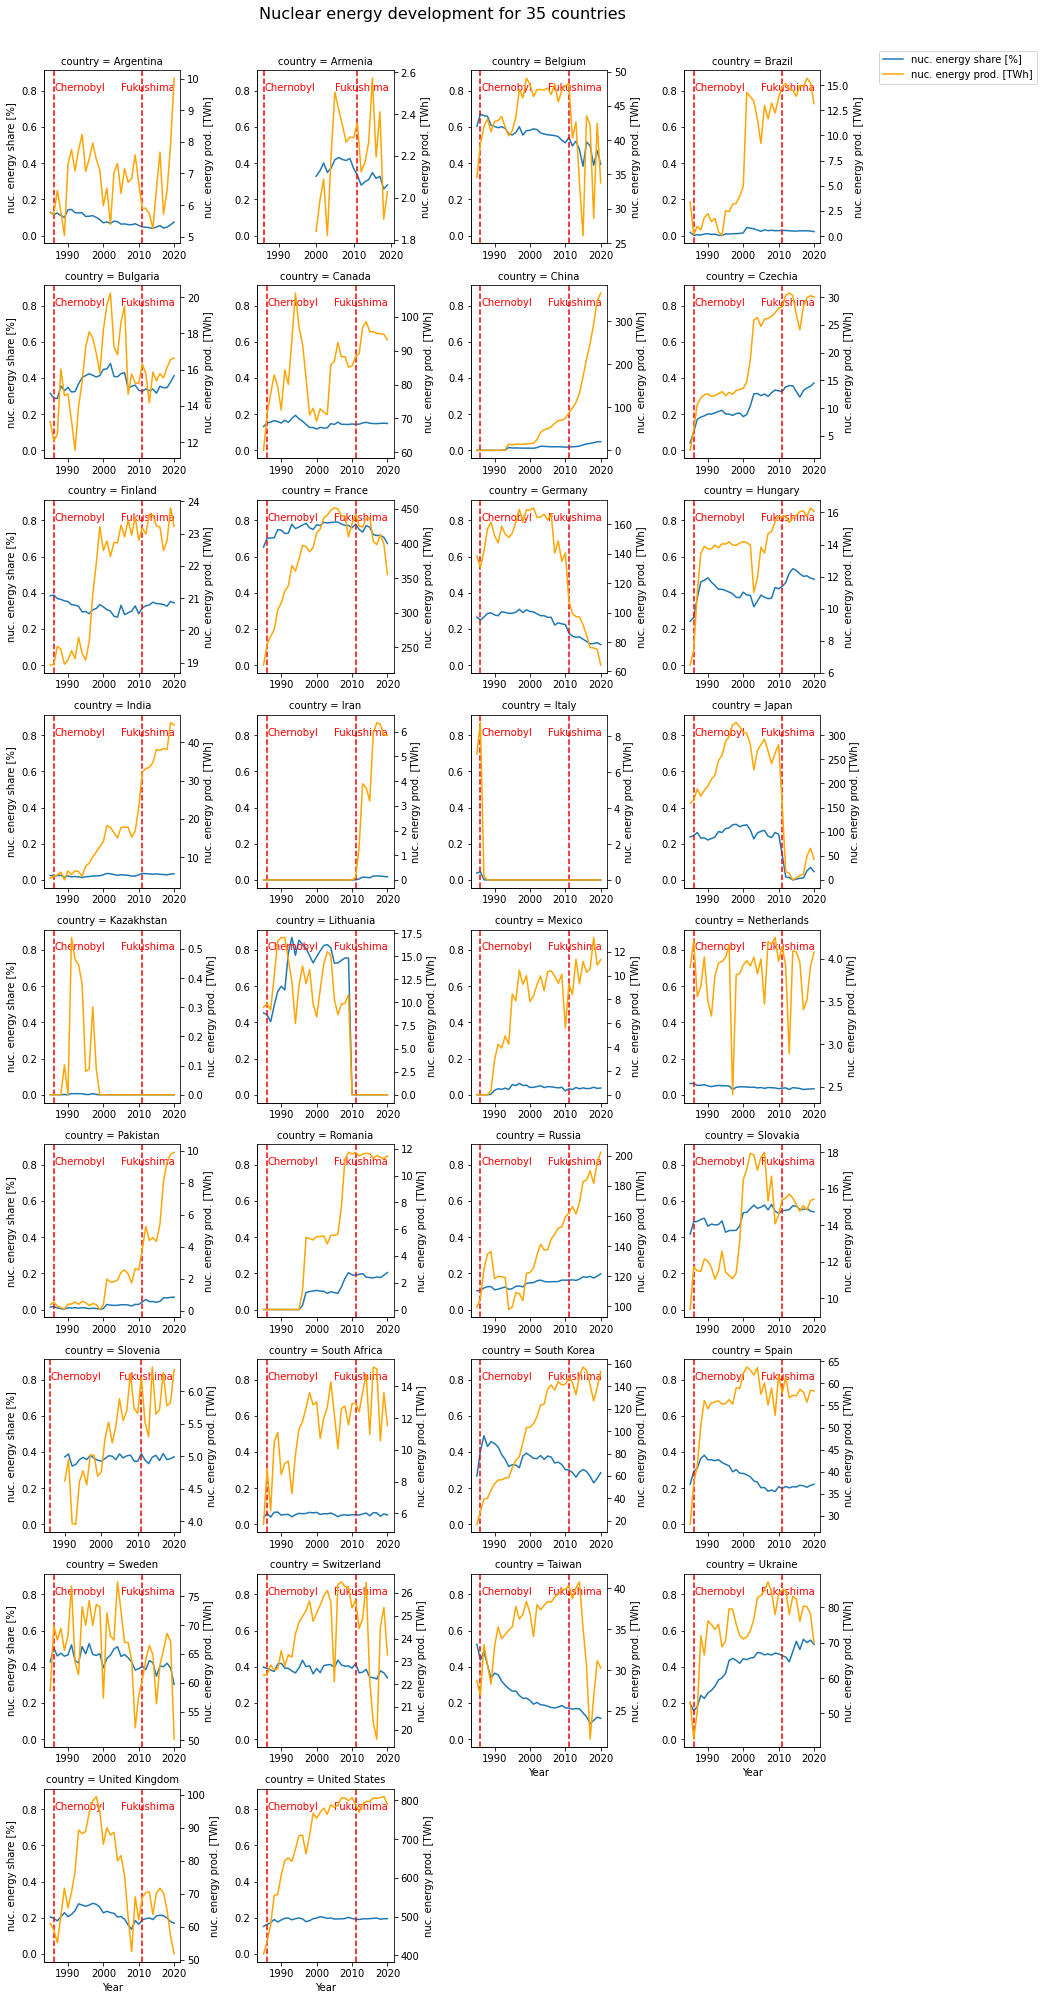

In [320]:
df_energy_without_world = df_energy[df_energy.country != 'World']
import matplotlib as mpl
def facetgrid_two_axes(*args, **kwargs):
    data = kwargs.pop('data')
    kwargs.pop('color')
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.set_ylabel('nuc. energy prod. [TWh]')

    ax.plot(data['year'],data['nuclear_electricity_share'], **kwargs, color=sns.color_palette()[0])

    ax.axvline(x=2011, color="red", linestyle="--")
    ax.text(2005, .8,'Fukushima',c="red")
    ax.axvline(x=1986, color="red", linestyle="--")
    ax.text(1986.2, .8,'Chernobyl',c="red")
    ax2.plot(data['year'],data['nuclear_electricity'], **kwargs, color='orange')

g = sns.FacetGrid(df_energy_without_world, col="country", col_wrap=4,sharex=False, legend_out=False)
(g.map_dataframe(facetgrid_two_axes)
 .set_axis_labels("Year", "nuc. energy share [%]"))
#g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Nuclear energy development for 35 countries', size=16, y=1.02)
legend_patches = [mpl.lines.Line2D([],[],color=sns.color_palette()[0], label="nuc. energy share [%]") ,mpl.lines.Line2D([],[],color="orange", label="nuc. energy prod. [TWh]")]
g.fig.legend(handles=legend_patches, loc = 2, bbox_to_anchor = (1,1))
plt.show()

We can see that Belgium is lowering it's share of nuclear energy, the rate of decline is higher since Fukushima. Also Germany has a decline in nuclear energy share. It also got a bit faster in phasing out since Fukushima. Japan has a very noticeable decline in share and absolute nuclear energy since the disaster. In Sweden and Switzerland, there can also be a slight decline observed.